<a href="https://colab.research.google.com/github/GyanendraChaubey/Personality-Prediction-through-Handwriting-Analysis-using-Convolution-Neural-Network/blob/master/Personality_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('/content/drive/MyDrive/FeatureExtracted.csv')

In [36]:
df.tail()

,Pressure,langle,wangle,stroke,wsize,distance,lsize,margin,Target
214,122,175.655100,149.775362,34,32500,39,2578,45,Openness
215,130,-38.655004,40.489561,48,58705,141,16465,3,Openness
216,148,-111.318417,-58.944715,20,72482,73,37971,40,Openness
217,122,179.182009,140.696285,37,47547,56,14299,0,Openness
218,142,151.833811,113.935461,43,73081,52,16074,28,Openness


In [37]:
df['Target'].value_counts()

Openness              92
Neuroticism           44
Agreeableness         38
Conscientiousness     35
Extraversion          10
Name: Target, dtype: int64

In [38]:
#split the dataset into features and target variable
y = df['Target']
x = df.drop('Target',axis = 1)
print(y.head())

0    Agreeableness 
1    Agreeableness 
2    Agreeableness 
3    Agreeableness 
4    Agreeableness 
Name: Target, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


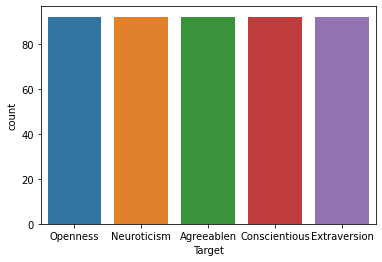

In [49]:
# visualize the target variable
g = sns.countplot(y)
g.set_xticklabels(['Openness','Neuroticism','Agreeablen','Conscientious','Extraversion'])
plt.show()

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


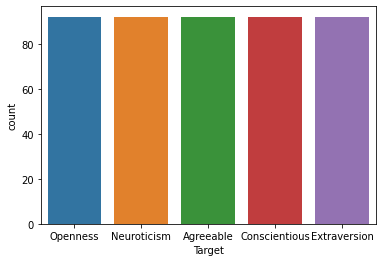

In [51]:
g = sns.countplot(y)
g.set_xticklabels(['Openness','Neuroticism','Agreeable','Conscientious','Extraversion'])
plt.show()

In [52]:
x.shape

(460, 8)

In [53]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

(322, 8)
(138, 8)


In [54]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

Cross Validation Accuracy: 64.59% 


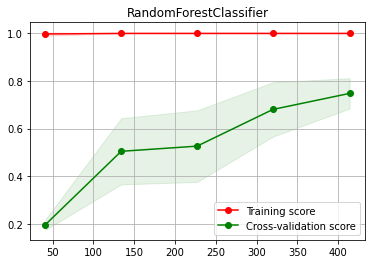

In [57]:
from sklearn.model_selection import learning_curve
train_sizes=np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        clf,
        x,
        y,
        cv=10,
        train_sizes=train_sizes,
        return_times=True,
    )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
plt.grid()
plt.fill_between(
train_sizes,
train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std,
alpha=0.1,
color="r",
    )
plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
plt.legend(loc="best")
plt.title('RandomForestClassifier')
plt.show()